<a href="https://colab.research.google.com/github/lucasarneiro5/Data-Science/blob/main/Airbnb_Data_Chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *CHICAGO*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade DE Chicago, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [51]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/il/chicago/2021-10-18/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* id = Numero de identificação de reserva;
* name = Nome da reserva disponivel; 
* host_id = ID do host (dono da reserva);
* host_name = Nome do dono da reserva;
* neighbourhood_group = Grupo da vizinhaça;
* neighbourhood = Bairro da reserva;
* latitude = Latitude de localizaçao da reserva;
* longitude = Longitude de localizaçao da reserva;
* room_type = Tipo de casa/apa/quarto que está sendo alugado; 
* price = Preço da diaria;
* minimum_nights = Minimo de noites que tem de ser alugada;
* number_of_reviews = Numero de feedbacks da locação;
* last_review = Ultima data que foi feita revisada;
* reviews_per_month = Numero de reviews/mês;
* calculated_host_listings_count = Quantidade de imoveis do mesmo anfitriao;
* availability_365 = Disponiblidade de dias por ano;
* number_of_reviews_ltm	= Numero de reviews por ltm?
* license = Numero da licensa.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Hyde Park - Walk to University of Chicago,2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,81,3,190,2021-09-24,2.41,1,329,10,R17000015609
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90166,-87.68021,Entire home/apt,65,2,414,2021-10-06,3.34,1,230,29,R18000034991
2,10945,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.91196,-87.63981,Entire home/apt,125,4,36,2021-10-04,0.40,7,144,16,2120297
3,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,NaN,Near North Side,41.90491,-87.63213,Entire home/apt,99,7,13,2021-10-16,0.16,1,0,4,City registration pending
4,12140,Lincoln Park Guest House,46734,Sharon And Robert,NaN,Lincoln Park,41.92357,-87.64947,Private room,329,2,7,2021-07-06,0.09,1,167,3,R20000055258


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O dataset apresenta 18 variáveis de entrada (features) e 6528 entradas de dados. 

Os tipos de variaveis descito na célula [8].

In [5]:
# identificar o volume de dados do DataFrame
df.shape

(6528, 18)

In [6]:
# Tipos de variaveis
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

1. De acordo com alogica abaixo, vemos a variavel *neighbourhood_group* com 100% de dados faltantes e entre 6% a 15% entre outras features. 

2. Podemos fazer os questionamentos como:


*   A coluna *neighbourhood_group* é importante para utilizar na análise?
*   As colunas *reviews_per_month*, *last_review*                                 , *license* e *host_name* já são importantes para a situação apresentada, por isso devem ser tratadas.



In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100

neighbourhood_group               100.000000
reviews_per_month                  15.594363
last_review                        15.594363
license                             6.770833
host_name                           0.045956
longitude                           0.000000
name                                0.000000
host_id                             0.000000
neighbourhood                       0.000000
latitude                            0.000000
room_type                           0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

**Alguns pontos são importantes de ressaltar**:

- O preço está na faixa de até 500,00, mas pela escala, poderemos ver valores de até 5000,00 (o que podem ser outliers);

- Assim como preço, o número minimo de noites apresenta valores discrepantes para o negócio, na faixa de 200 a 500 noites;

- O número de locações/hosts listados apresenta, aparentemente um valor de outlier, 300. É possivel alguem ter 300 casas/ap para locação em uma unica cidade?

- Podemos plotar bloxplots para confirmar essas teorias.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65289f8250>,
      dtype=object)

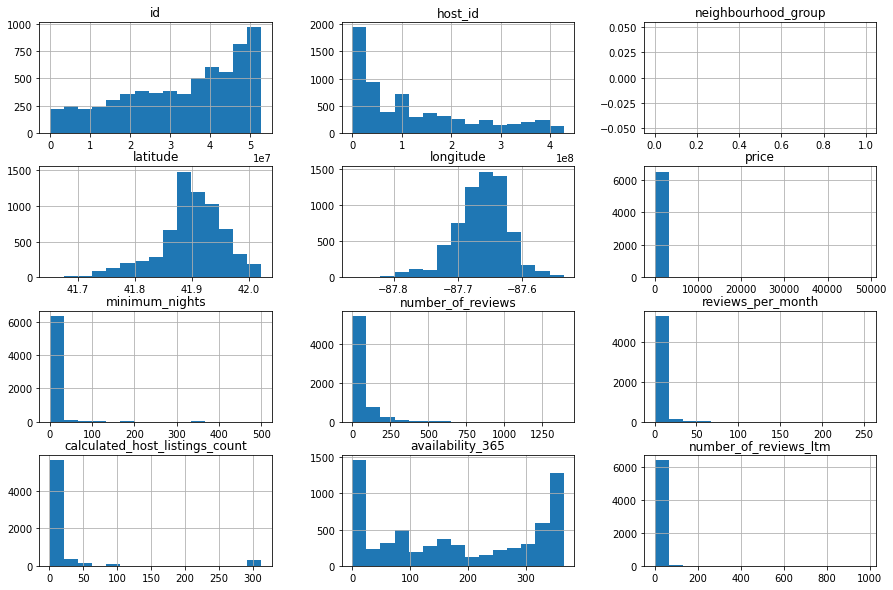

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

In [9]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.528000e+03,6.528000e+03,0.0,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,5510.000000,6528.000000,6528.000000,6528.000000
mean,3.305271e+07,1.217399e+08,NaN,41.898251,-87.663115,299.258425,9.211397,46.377145,3.521632,22.345895,178.385110,11.925858
std,1.494224e+07,1.200565e+08,NaN,0.058499,0.042220,2319.930240,22.728897,75.133071,7.855918,66.699864,137.490354,22.877154
min,2.384000e+03,2.153000e+03,NaN,41.650640,-87.864150,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.140874e+07,2.191582e+07,NaN,41.872585,-87.686815,75.000000,1.000000,2.000000,0.530000,1.000000,44.000000,0.000000
50%,3.652392e+07,8.490272e+07,NaN,41.899715,-87.659450,119.000000,2.000000,16.000000,1.720000,2.000000,166.000000,4.000000
75%,4.641521e+07,1.915230e+08,NaN,41.938783,-87.632417,190.000000,4.000000,57.000000,3.760000,9.000000,327.000000,18.000000
max,5.282783e+07,4.273566e+08,NaN,42.022200,-87.535880,48864.000000,500.000000,1390.000000,252.000000,313.000000,365.000000,982.000000


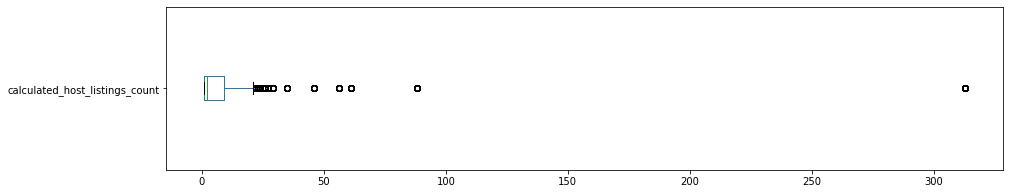

In [10]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

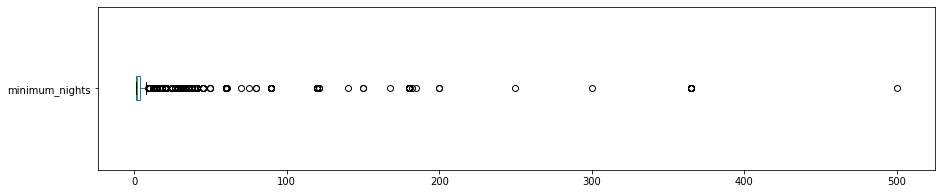

Numero minimo de noites com valores acima de 30: 632 entradas
Pocentagem de valores acima de 30 noites: 9.6814%


In [32]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("Numero minimo de noites com valores acima de 30: {} entradas".format(len(df[df.minimum_nights > 30])))
print("Pocentagem de valores acima de 30 noites: {:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

- O preço minimo é de 0.00 dolares (o que não faz sentido dentro do contexto) e o valor máximo de 48.864K dolares, seriam outliers? Para o valor de 0 doláres, sim, mas para o valor alto, talvez não, dependendo da hospedagem (vulgo Copacabana Palace), mas o valor iria influencia na criação de um modelo;

- Ao número maximo de noites é de 500. Faria mais sentido, pensando uma locação de 1 ano e meio (aluguel em contrato);

- O número de locações/hosts listados apresenta, aparentemente um valor de outlier, 300. É possivel alguem ter 313 casas/ap para locação em uma unica cidade? Provavelmente não...podemos considerar um Outlier.



---


**Tratamento dos Dados**

In [31]:
df_clean = df.copy()

# Remover valores de apartamentos maior que 23 por hosting
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 23].index, axis=0, inplace=True)

# Remover valores de minimo de noites > 30. Visto que nao faria tanto sentido
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Remover coluna nao utilizada
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

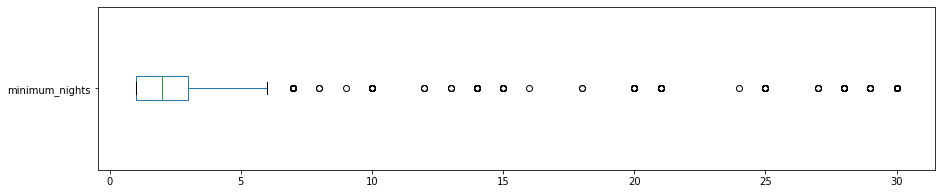

Numero minimo de noites com valores acima de 30: 0 entradas
Pocentagem de valores acima de 30 noites: 0.0000%


In [33]:
# minimum_nights
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("Numero minimo de noites com valores acima de 30: {} entradas".format(len(df_clean[df_clean.minimum_nights > 30])))
print("Pocentagem de valores acima de 30 noites: {:.4f}%".format((len(df_clean[df_clean.minimum_nights > 30]) / df_clean.shape[0])*100))

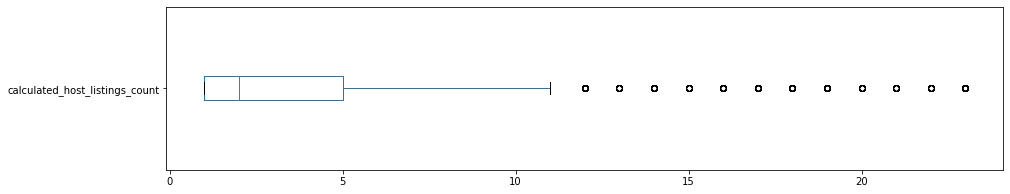

In [34]:
# calculated_host_listings_count
df_clean.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

### **Q4. Qual a média dos preços de aluguel?**

In [35]:
# ver a média da coluna `price``
print("R${:.2f}".format(df_clean.price.mean()))

R$328.52


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

In [36]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.028851,-0.046736,-0.029769,0.175404,0.082427
minimum_nights,-0.028851,1.000000,-0.125863,-0.092369,0.049802,-0.001475
number_of_reviews,-0.046736,-0.125863,1.000000,0.194693,-0.050282,0.057578
reviews_per_month,-0.029769,-0.092369,0.194693,1.000000,0.081048,0.100574
calculated_host_listings_count,0.175404,0.049802,-0.050282,0.081048,1.000000,0.186224
availability_365,0.082427,-0.001475,0.057578,0.100574,0.186224,1.000000


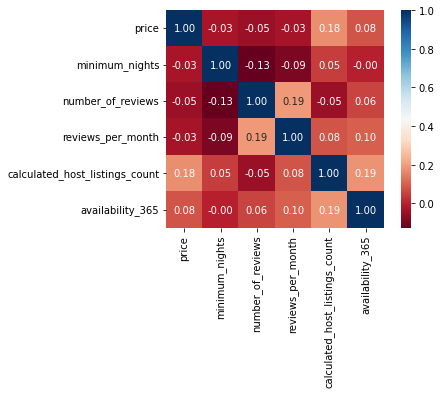

In [37]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

- Vemos uma maior correlação positiva (enquanto um cresce, o outro também) entre *calculated_host_listings_count* e *minimum_nights*;

- Assim como uma maior correlação negativa (enquanto um cresce, o outro diminui) entre *number_of_reviews* e *minimum_nights*.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [38]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3682
Private room       1484
Shared room          90
Hotel room           63
Name: room_type, dtype: int64

Vemos que a casa/apartamento inteiro é o tipo que mais estão disponiveis em Chicago para locação no Airbnb.

In [39]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]*100

Entire home/apt    69.223538
Private room       27.899981
Shared room         1.692047
Hotel room          1.184433
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [40]:
# ver preços por bairros, na média
df_clean.groupby(by=['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
West Town          1434.770167
Loop                427.802395
West Englewood      249.428571
Near North Side     245.747126
Lake View           240.592275
Lincoln Park        220.351464
Near West Side      212.522634
Burnside            200.000000
Near South Side     192.853659
Logan Square        177.784367
Name: price, dtype: float64

A partir da organização em groupby pelos bairros e média de preços, nos organizamos em ordem decrescente de valores das diárias. COm isso, vemos que a localidade mais cara em média é em West Town, em Chicago.

Agora como questionamento para quem mora em Chicago...concordaria com esta avaliação?

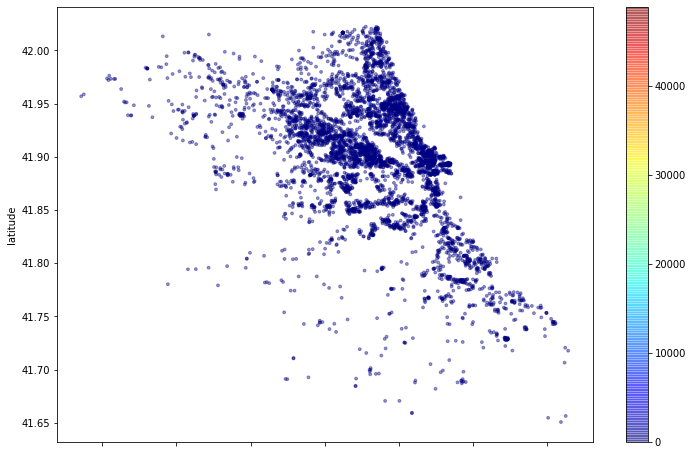

In [41]:
# plotar os imóveis pela latitude-longitude
# x - longitude e y - latitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8))

Vemos uma maior concentração de imóveis...**???????**

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [42]:
# ver a média da coluna `minimum_nights``
df_clean.groupby(by=['minimum_nights'])['price'].mean().sort_values(ascending=False)[:10]

minimum_nights
1     631.126377
13    278.000000
3     212.949315
7     212.131783
4     204.792453
2     182.212151
30    171.536585
5     152.800000
9     141.000000
20    117.800000
Name: price, dtype: float64

Para o minimo de 1x noite, temos em média o valor de $631.13. Valor um pouco alto para uma média...vamos ver de onde ele vem.

In [49]:
df_clean['price'].loc[df_clean['price'] > 600].describe()

count      167.000000
mean      6038.485030
std      13298.991561
min        610.000000
25%        716.000000
50%       1000.000000
75%       1500.000000
max      48864.000000
Name: price, dtype: float64

Temos 167 imóveis acima de $600 a diária, com isso é possivel concluir que nao é tão fora do padrão algumas regiões apresentarem este valor de diaria na cidade de Chicago.

In [52]:
bairros = dict(df_clean['neighbourhood'].value_counts())
bairros =  pd.DataFrame(list(bairros.items()), columns=['Bairro', 'Número_de_locações'])

bar_plot3 = px.bar(bairros, x='Bairro', y='Número_de_locações', color='Bairro', text='Número_de_locações')

bar_plot3.update_layout(title_text='Os 10 bairros mais procurados em Chicago',
                        yaxis_title = 'Número de imóveis disponíveis')
                        
bar_plot3.update_traces(texttemplate='%{text:.4s}', textposition='outside')
bar_plot3.show()

## Conclusões


* Vemos que a cidade de Chicago possui valores bem altos de diária. É uma cidade famosa, movimentada, com locações de luxo e talvez por isso, eles apresentam valores altos de diárias em algumas regiões, principalmente em West Town.

* Foi feita uma análise superficial de dados do Airbnb na cidade, seria importante adquirir um dataset mais completo e atualizado com informações da cidade que permitam melhores análises.

* Com base nas informações apresentadas, é possivel um turista que nunca foi a cidade tirar algumas conclusões que o permitam escolher a melhor região possivel para se hospedar na cidade.